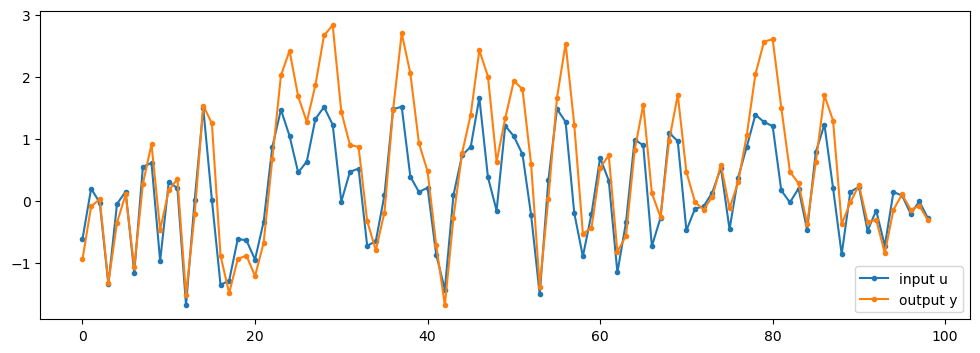

In [4]:
using CSV, PyPlot, LinearAlgebra

raw = CSV.read("uy_data.csv");
u = raw[:,1];
y = raw[:,2];
T = length(u)

figure(figsize=(12,4))
plot([u y],".-");
legend(["input u", "output y"], loc="lower right");

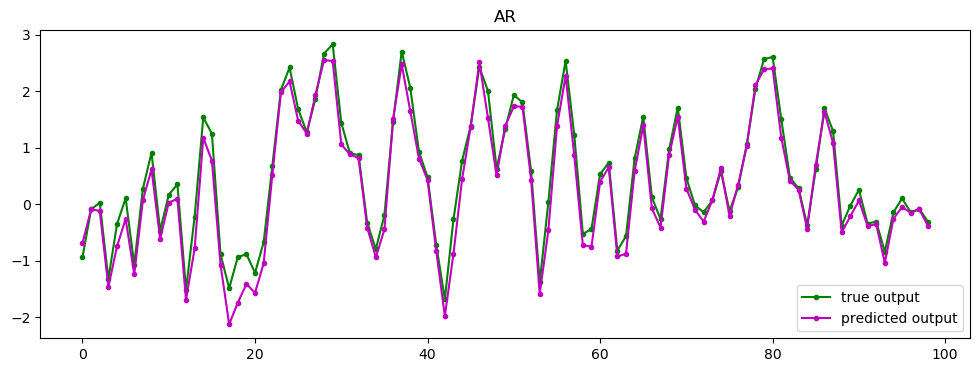


2.4767439159452964


In [9]:
# MA
k = 3
U = zeros(T,k)
for i = 1:k
    U[i:end,i] = u[1:end-i+1]
end
b_hat = U\y
y_hat = U*b_hat

figure(figsize=(12,4))
plot(y,"g.-",y_hat,"m.-")
legend(["true output", "predicted output"], loc="lower right");
title("AR");
println()
println(norm(y-y_hat))

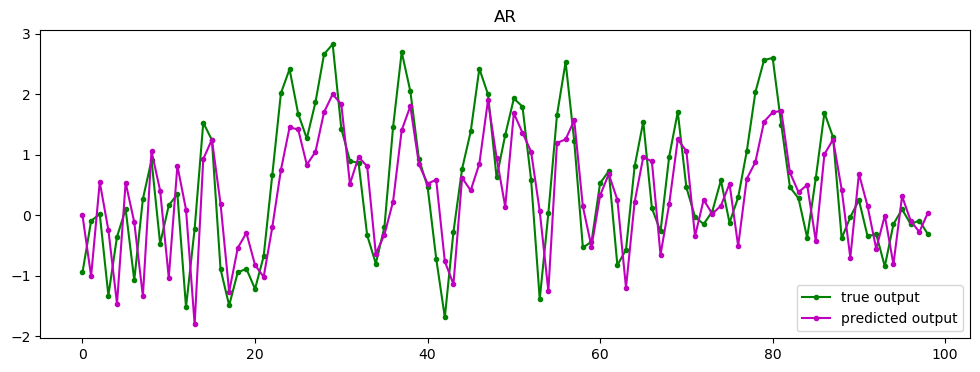


7.625757761295332


In [10]:
# AR
m = 3
Y = zeros(T,m)
for i = 1:m
    Y[i+1:end,i] = y[1:end-i]
end
a_hat = Y\y
y_hat = Y*a_hat

figure(figsize=(12,4))
plot(y,"g.-",y_hat,"m.-")
legend(["true output", "predicted output"], loc="lower right");
title("AR");
println()
println(norm(y-y_hat))

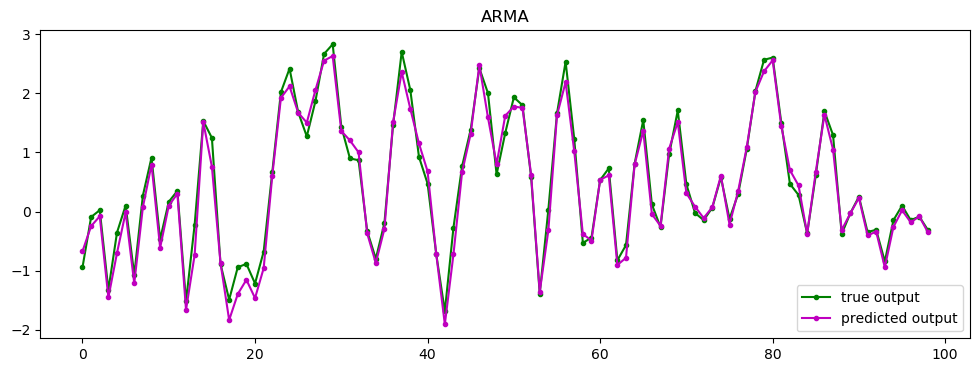


1.8580728635982355


In [11]:
# ARMA
k = 1
m = 1
A = zeros(T,m+k)
# TODO: make loops generic for m and k
A[2:end,1] = y[1:end-1]
A[1:end,2] = u[1:end]

x_hat = A\y
y_hat = A*x_hat

figure(figsize=(12,4))
plot(y,"g.-",y_hat,"m.-")
legend(["true output", "predicted output"], loc="lower right");
title("ARMA");
println()
println(norm(y-y_hat))